In [13]:
import numpy as np
from diffeqpy import de
import matplotlib.pyplot as plt
from SanoSawada import SanoSawada
import numpy as np

# Lorenz 方程式の場合

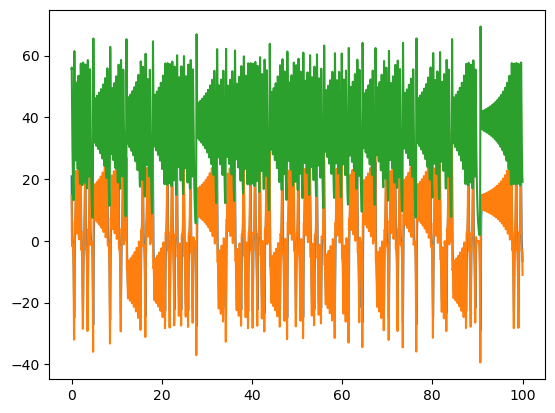

In [43]:
def lorenz(du,u,p,t):
    du[0] = p[0] * (u[1] - u[0])
    du[1] = u[0] * (p[1] - u[2]) - u[1]
    du[2] = u[0] * u[1] - p[2] * u[2]

transient = 20.
dt = 1e-2
p = np.array([16.,40.,4.])

# transient 
u0 = np.array([2.,0.,0.])
tspan = (0., transient)
prob = de.ODEProblem(lorenz, u0, tspan, p)
jit_prob = de.jit(prob)
sol = de.solve(jit_prob)

# steps_on_attractor
u0 = sol.u[-1]
tspan = (0., 100.)
prob = de.ODEProblem(lorenz, u0, tspan, p)
jit_prob = de.jit(prob)
sol = de.solve(jit_prob,saveat=dt)

plt.plot(sol.t,de.transpose(de.stack(sol.u)))
plt.show()

In [41]:
np.asarray(u0)

array([20.894304, 14.660244, 55.694874], dtype=float32)

In [25]:
t = np.arange(0.0,100.0,0.1)

In [18]:
t_array = np.array(sol.t)
u_array = np.stack([np.array(u_i) for u_i in sol.u])

In [2]:
from SanoSawada import SanoSawada

In [5]:
ss=SanoSawada(problem=None,dim_prob=1,dim_recon=1,num_neighbor=1,dt_prob=1.0,dt_jac=1.0,t_delay=1.0)

In [13]:
sol.t

1274-element Vector{Float32}:
   0.0
   1.0f-6
   4.5277493f-6
   1.4920923f-5
   5.040851f-5
   0.0001470003
   0.00036493386
   0.0009651219
   0.0027508056
   0.006115063
   ⋮
  99.143875
  99.253525
  99.35313
  99.48712
  99.591576
  99.71176
  99.8065
  99.91268
 100.0

In [27]:
u_1 = sol.u[-1]

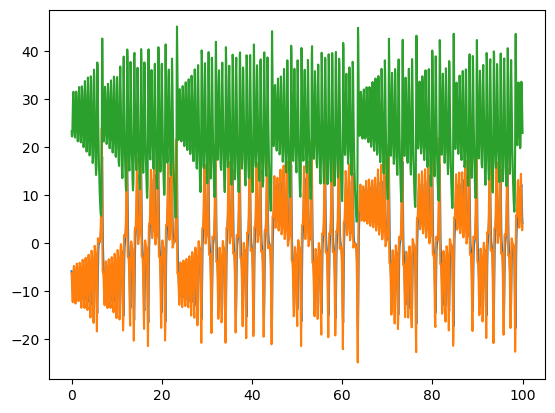

In [33]:
prob = de.ODEProblem(f, u_1, tspan, p)
jit_prob = de.jit(prob)
sol = de.solve(jit_prob)
de.transpose(de.stack(sol.u))

plt.plot(sol.t,de.transpose(de.stack(sol.u)))
plt.show()

In [34]:
sol.u

1318-element Vector{Vector{Float32}}:
 [-5.8630776, -6.278476, 23.224026]
 [-6.3303404, -7.6405153, 22.242891]
 [-7.2368197, -9.304719, 22.155851]
 [-8.895038, -11.469145, 23.783241]
 [-10.589333, -12.319485, 27.508904]
 [-11.018291, -10.293755, 31.050503]
 [-9.60218, -6.8569465, 31.47658]
 [-7.2496524, -4.757722, 28.710796]
 [-5.852051, -4.840299, 25.433908]
 [-5.772118, -6.5692735, 22.432718]
 ⋮
 [4.4731975, 4.1948123, 22.828032]
 [5.2362843, 6.9656215, 19.735819]
 [7.5010242, 10.840328, 20.062521]
 [11.302425, 14.39179, 26.698]
 [12.125466, 10.345948, 33.58846]
 [9.157833, 4.5742006, 32.771786]
 [5.625944, 2.644679, 27.78714]
 [4.067653, 3.443166, 23.019464]
 [4.0527453, 3.4856975, 22.901825]

In [15]:
t_array = np.array(sol.t)
t_array

array([0.0000000e+00, 1.0000000e-06, 4.5277493e-06, ..., 9.9806503e+01,
       9.9912682e+01, 1.0000000e+02], dtype=float32)

In [16]:
u_array = np.stack([np.array(u_i) for u_i in sol.u])
u_array

array([[ 1.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 9.9998999e-01,  2.7999844e-05,  1.3999875e-11],
       [ 9.9995470e-01,  1.2677381e-04,  2.8699224e-10],
       ...,
       [-8.4257164e+00, -5.7257214e+00,  3.0145565e+01],
       [-6.2003369e+00, -4.9879246e+00,  2.6076174e+01],
       [-5.8630776e+00, -6.2784762e+00,  2.3224026e+01]], dtype=float32)